In [1]:
import numpy as np
import sys
sys.path.append('../')
from symmetry_breaking_measure import Nickel, RotationOperator
import matplotlib.pyplot as plt
from bg_mpl_stylesheet.bg_mpl_stylesheet import bg_mpl_style
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.image import imread
from matplotlib import rc
from tqdm import tqdm
from typing import Tuple
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

def make_Ramp(ramp_colors): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    return color_ramp

BLUE, RED, YELLOW, MIDDLE = '#0B3C5D', '#B82601', '#D9B310', '#a8b6c1'
axis = [0,0,1]
angles = np.linspace(0, 360, 361)

NUM_SAMPLES = 50000
CONFIDENCE_LEVEL = .95
TOLERANCE_ONE_SIDE = .0025

# The symmetry breaking from the boundary of the finite cluster

In [2]:
def calc_variance_sample_size_from_nickel(nickel_structure, op, **operator_kwrgs):
    sample_size, measure = nickel_structure.calc_symmetry_breaking_measure_sample_size(
        num_samples=NUM_SAMPLES,
        operator=op,
        confidence_interval=CONFIDENCE_LEVEL,
        tolerance_single_side=TOLERANCE_ONE_SIDE,
        method='JS',
        **operator_kwrgs
        )
    return measure, sample_size

def test_symmetry_breaking_measure(
    nickel_structure,
    save_filedir: str = None
):
    origin = nickel_structure.xyz.mean(axis=0)
    rotation_op = RotationOperator(axis=axis, origin=origin)
    measures = [
        nickel_structure.calc_symmetry_breaking_measure(
            num_samples=calc_variance_sample_size_from_nickel(nickel_structure, rotation_op, angle=angle)[1][:2],
            operator=rotation_op, 
            method='JS', 
            angle=angle
        )
        for angle in tqdm(angles)
    ]
    measures_data = np.column_stack((angles, measures))
    if save_filedir:
        np.savetxt(save_filedir, measures_data, delimiter=',') 
    return measures_data

def plot_symmetry_breaking_measure(
    measures_data: np.ndarray,
    fig_size: Tuple[int, int],
    color: str,
    min_color: str,
    style: str = "default",
    save_filedir: str = None
):
    plt.style.use(style)
    rc('text', usetex = True) 
    params= {'text.latex.preamble' : r'\usepackage{mathrsfs}'}
    plt.rcParams.update(params)
    angles, measures = measures_data[:, 0], measures_data[:, 1]
    measures_round = np.round(measures, 5)
    min_idx = np.where(measures_round == np.amin(measures_round))[0]
    fig, ax = plt.subplots(figsize=fig_size)
    ax.plot(angles, measures, color=color)
    for idx in min_idx:
        ax.axvline(x=angles[int(idx)], color=min_color, linestyle="--")
    ax.set_ylabel(r'$\mathscr{S}^{JS}_{R_\alpha}$')
    ax.set_xlabel(r'$\alpha$ (degree)')
    ax.set_xlim([0,360])
    ax.set_ylim([0,1])
    plt.show()
    if save_filedir:
        fig.savefig(save_filedir)

100%|██████████| 361/361 [02:20<00:00,  2.57it/s]


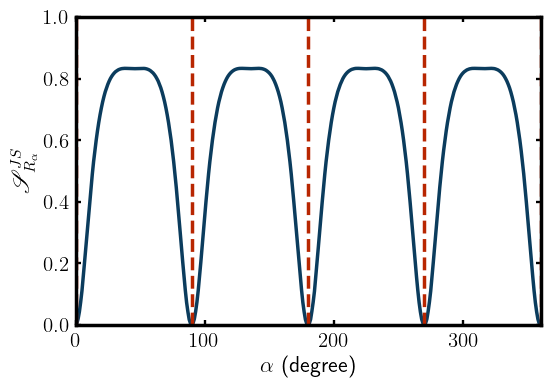

In [3]:
# Spheroid cut off from Nickel (radius=1)
spheroid_nickel = Nickel(cutoff='ellipsoid', cutout_x=1, cutout_y=1, cutout_z=1)
save_filedir = '../figs/nickel/spheroid_nickel_rotation.csv'
fig_directory = '../figs/nickel/spheroid_nickel_rotation.png'
measures_data = test_symmetry_breaking_measure(spheroid_nickel, save_filedir=save_filedir)
plot_symmetry_breaking_measure(measures_data, fig_size=(6,4), color=BLUE, min_color=RED, style=bg_mpl_style, save_filedir=fig_directory)

100%|██████████| 361/361 [04:47<00:00,  1.26it/s]


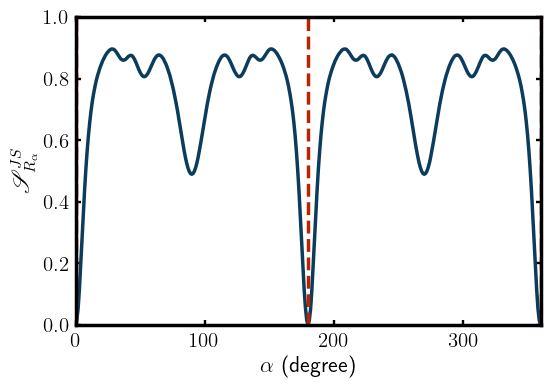

In [3]:
# Ellipsoid cut off from Nickel
ellipsoid_nickel = Nickel(cutoff='ellipsoid', cutout_x=2, cutout_y=1, cutout_z=1)
save_filedir = '../figs/nickel/ellipsoid_nickel_rotation.csv'
fig_directory = '../figs/nickel/ellipsoid_nickel_rotation.png'
measures_data = test_symmetry_breaking_measure(ellipsoid_nickel, save_filedir=save_filedir)
plot_symmetry_breaking_measure(measures_data, fig_size=(6,4), color=BLUE, min_color=RED, style=bg_mpl_style, save_filedir=fig_directory)

100%|██████████| 361/361 [01:43<00:00,  3.50it/s]


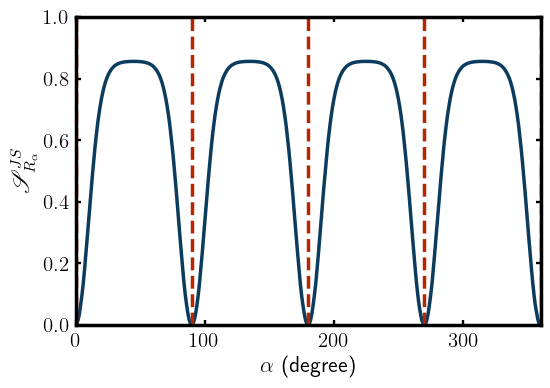

In [3]:
# Cubic cut off from Nickel (length=1)
cubic_nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
save_filedir = '../figs/nickel/cubic_solid_nickel_rotation.csv'
fig_directory = '../figs/nickel/cubic_solid_nickel_rotation.png'
measures_data = test_symmetry_breaking_measure(cubic_nickel, save_filedir=save_filedir)
plot_symmetry_breaking_measure(measures_data, fig_size=(6,4), color=BLUE, min_color=RED, style=bg_mpl_style, save_filedir=fig_directory)

100%|██████████| 361/361 [02:32<00:00,  2.37it/s]


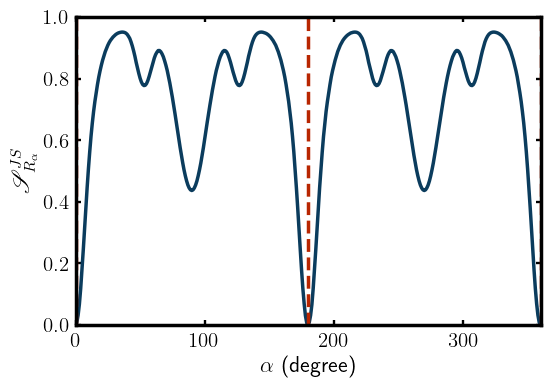

In [3]:
# Rectangular cut off from Nickel
rectangular_solid_nickel = Nickel(cutoff='rectangular_solid', cutout_x=2, cutout_y=1, cutout_z=1)
save_filedir = '../figs/nickel/rectangular_solid_nickel_rotation.csv'
fig_directory = '../figs/nickel/rectangular_solid_nickel_rotation.png'
measures_data = test_symmetry_breaking_measure(rectangular_solid_nickel, save_filedir=save_filedir)
plot_symmetry_breaking_measure(measures_data, fig_size=(6,4), color=BLUE, min_color=RED, style=bg_mpl_style, save_filedir=fig_directory)

# Paper Section 5.1.1

In [4]:
def plot_compare(x, y1, y2, xlim: list, ylim: list, xlabel, ylabel, subfigs_info: dict, text: dict, fig_size: Tuple[int, int], style: str = "default", save_filedir=None):
    fig = plt.figure()
    fig.set_size_inches(fig_size[0],fig_size[1])
    plt.style.use(style)
    
    ax_main = fig.add_subplot()
    ax_main.plot(x, y1, color=BLUE, alpha=.85)
    ax_main.plot(x, y2, color=RED, alpha=.85)
    ax_main.set_xlim(xlim)
    ax_main.set_ylim(ylim)
    
    rc('text', usetex = True) 
    params= {'text.latex.preamble' : r'\usepackage{mathrsfs}'}
    plt.rcParams.update(params)
    ax_main.set_xlabel(xlabel)
    ax_main.set_ylabel(ylabel)
    
    for key, value in subfigs_info.items():
        img = imread(key)
        ax_spheroid = fig.add_axes(value)
        ax_spheroid.imshow(img)
        ax_spheroid.set_axis_off()
        
    ax_text = fig.add_axes(text['loc'])
    ax_text.text(0, 0, text['content'])
    ax_text.set_axis_off()
        
    plt.show()
    if save_filedir:
        fig.savefig(save_filedir)

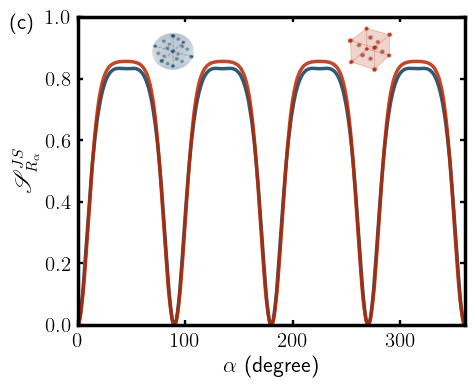

In [5]:
# spheroid and cubic solid
spheroid_filedir = '../figs/nickel/spheroid_nickel_rotation.csv'
cubic_filedir = '../figs/nickel/cubic_solid_nickel_rotation.csv'
save_filedir = '../figs/nickel/rotation_spheroid_vs_cubic_solid.png'
spheroid_measures_data = np.loadtxt(spheroid_filedir, delimiter=',')
cubic_measures_data = np.loadtxt(cubic_filedir, delimiter=',')
plot_compare(x=spheroid_measures_data[:,0], y1=spheroid_measures_data[:,1], y2=cubic_measures_data[:,1],
             xlim=[angles[0], angles[-1]], ylim=[0,1], xlabel=r'$\alpha$ (degree)', ylabel=r'$\mathscr{S}^{JS}_{R_\alpha}$',
             subfigs_info={'../figs/nickel/spheroid_nickel_samples_nobackground.png': [0.26, 0.74, 0.11, 0.11],
                           '../figs/nickel/cubic_solid_nickel_samples_nobackground.png': [0.65, 0.74, 0.12, 0.12]},
             text={'content':'(c)', 'loc':[-0.01, .85, 0, 0]}, 
             fig_size=(5,4), style=bg_mpl_style, save_filedir=save_filedir)

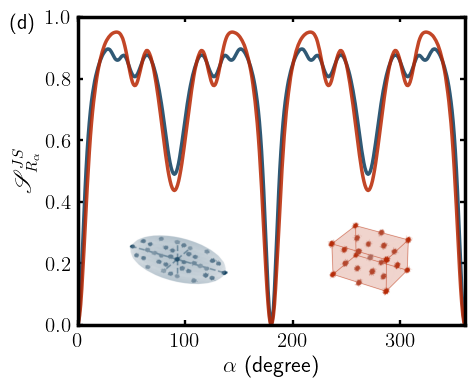

In [6]:
# ellipsoid and rectangular solid
ellipsoid_filedir = '../figs/nickel/ellipsoid_nickel_rotation.csv'
rectangular_filedir = '../figs/nickel/rectangular_solid_nickel_rotation.csv'
save_filedir = '../figs/nickel/rotation_ellipsoid_vs_rectangular_solid.png'
ellipsoid_measures_data = np.loadtxt(ellipsoid_filedir, delimiter=',')
rectangular_measures_data = np.loadtxt(rectangular_filedir, delimiter=',')
plot_compare(x=ellipsoid_measures_data[:,0], y1=ellipsoid_measures_data[:,1], y2=rectangular_measures_data[:,1],
             xlim=[angles[0], angles[-1]], ylim=[0,1], xlabel=r'$\alpha$ (degree)', ylabel=r'$\mathscr{S}^{JS}_{R_\alpha}$',
             subfigs_info={'../figs/nickel/ellipsoid_nickel_samples_nobackground.png': [0.20, 0.15, 0.25, 0.25],
                           '../figs/nickel/rectangular_solid_nickel_samples_nobackground.png': [0.60, 0.17, 0.22, 0.22]},
             text={'content':'(d)', 'loc':[-0.01, .85, 0, 0]}, 
             fig_size=(5,4), style=bg_mpl_style, save_filedir=save_filedir)

In [8]:
sum = 0
for angle in [90, 180, 270]:
    print(ellipsoid_measures_data[angle,:])
    sum += ellipsoid_measures_data[angle,1]
print(sum/3)

[90.      0.4908]
[1.80000000e+02 2.01998696e-15]
[270.       0.4908]
0.3271999999740612


In [14]:
sum = 0
for angle in [90, 180, 270]:
    print(rectangular_measures_data[angle,:])
    sum += rectangular_measures_data[angle,1]
print(sum/3)

[90.       0.43985]
[1.80000000e+02 1.88432603e-17]
[270.        0.43985]
0.29323333329706863
